In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Simple Regression Dataset - Straight line

Input feature: X <br>
Target: 5*X + 8 + some noise <br>
Objective: Train a model to predict target for a given X


In [21]:
# Straight line function

def straight_line(x):
    return 5*x+8

In [22]:
straight_line(20)

108

In [23]:
straight_line(1.254)

14.27

In [24]:
np.random.seed(5)

In [25]:
np.random.randn(4)*10

array([ 4.41227487, -3.30870152, 24.30771187, -2.5209213 ])

In [26]:
samples = 150
x = pd.Series(np.arange(0,150))

In [27]:
x

0        0
1        1
2        2
3        3
4        4
      ... 
145    145
146    146
147    147
148    148
149    149
Length: 150, dtype: int64

In [28]:
y = x.map(straight_line)+np.random.randn(samples)*10

In [29]:
df = pd.DataFrame({'x': x, 'y':y})

In [30]:
df.head()

,x,y
0,0,9.096098
1,1,28.824811
2,2,8.907676
3,3,17.083633
4,4,29.876032


In [31]:
df.corr()

,x,y
x,1.000000,0.998893
y,0.998893,1.000000


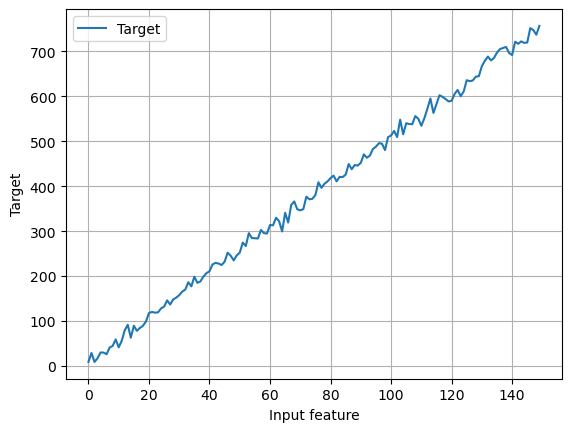

In [32]:
plt.plot(df.x, df.y,label='Target')
plt.grid(True)
plt.xlabel('Input feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [33]:
df.to_csv('linear_all.csv', index=False, columns=['x','y'])

### Sagemaker Convention for Training and Validation files

CSV File Column order: y_noisy, x

Training, Validation files do not have a column header

In [36]:
# Training = 70%
# Validation = 30% 
# Randomize the dataset

np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]

In [37]:
df.head()

,x,y
82,82,410.895336
134,134,685.471526
114,114,563.187408
42,42,229.393430
109,109,550.185699


In [38]:
rows = df.shape[0]
train = int(.7*rows)
test = rows-train

In [39]:
print(rows,train,test)

150 105 45


In [41]:
# write Training set
df[:train].to_csv('linear_train.csv',index=False, header=False, columns=['y','x'])

In [42]:
# write Testing set
df[train:].to_csv('linear_validation.csv',index=False, header=False, columns=['y','x'])